In [1]:
import cv2
import os
import numpy as np
import random
from generator import captcha_generator as gen
        
from keras.models import *
from keras.layers import *

chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghijlmnqrtuwxy1234567890"
width, height, n_len, n_class = 140, 43, 6, len(chars)

input_tensor = Input((height, width, 3))
x = input_tensor
#for i in range(4):
    #x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    #x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    #x = MaxPooling2D((2, 2))(x)

#x = Conv2D(32, (5, 5), activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(64, (5, 5), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(128, (5, 5), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(256, (3, 3), activation='relu')(x)
#x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(n_len)]
model = Model(inputs=input_tensor, outputs=x)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Using TensorFlow backend.


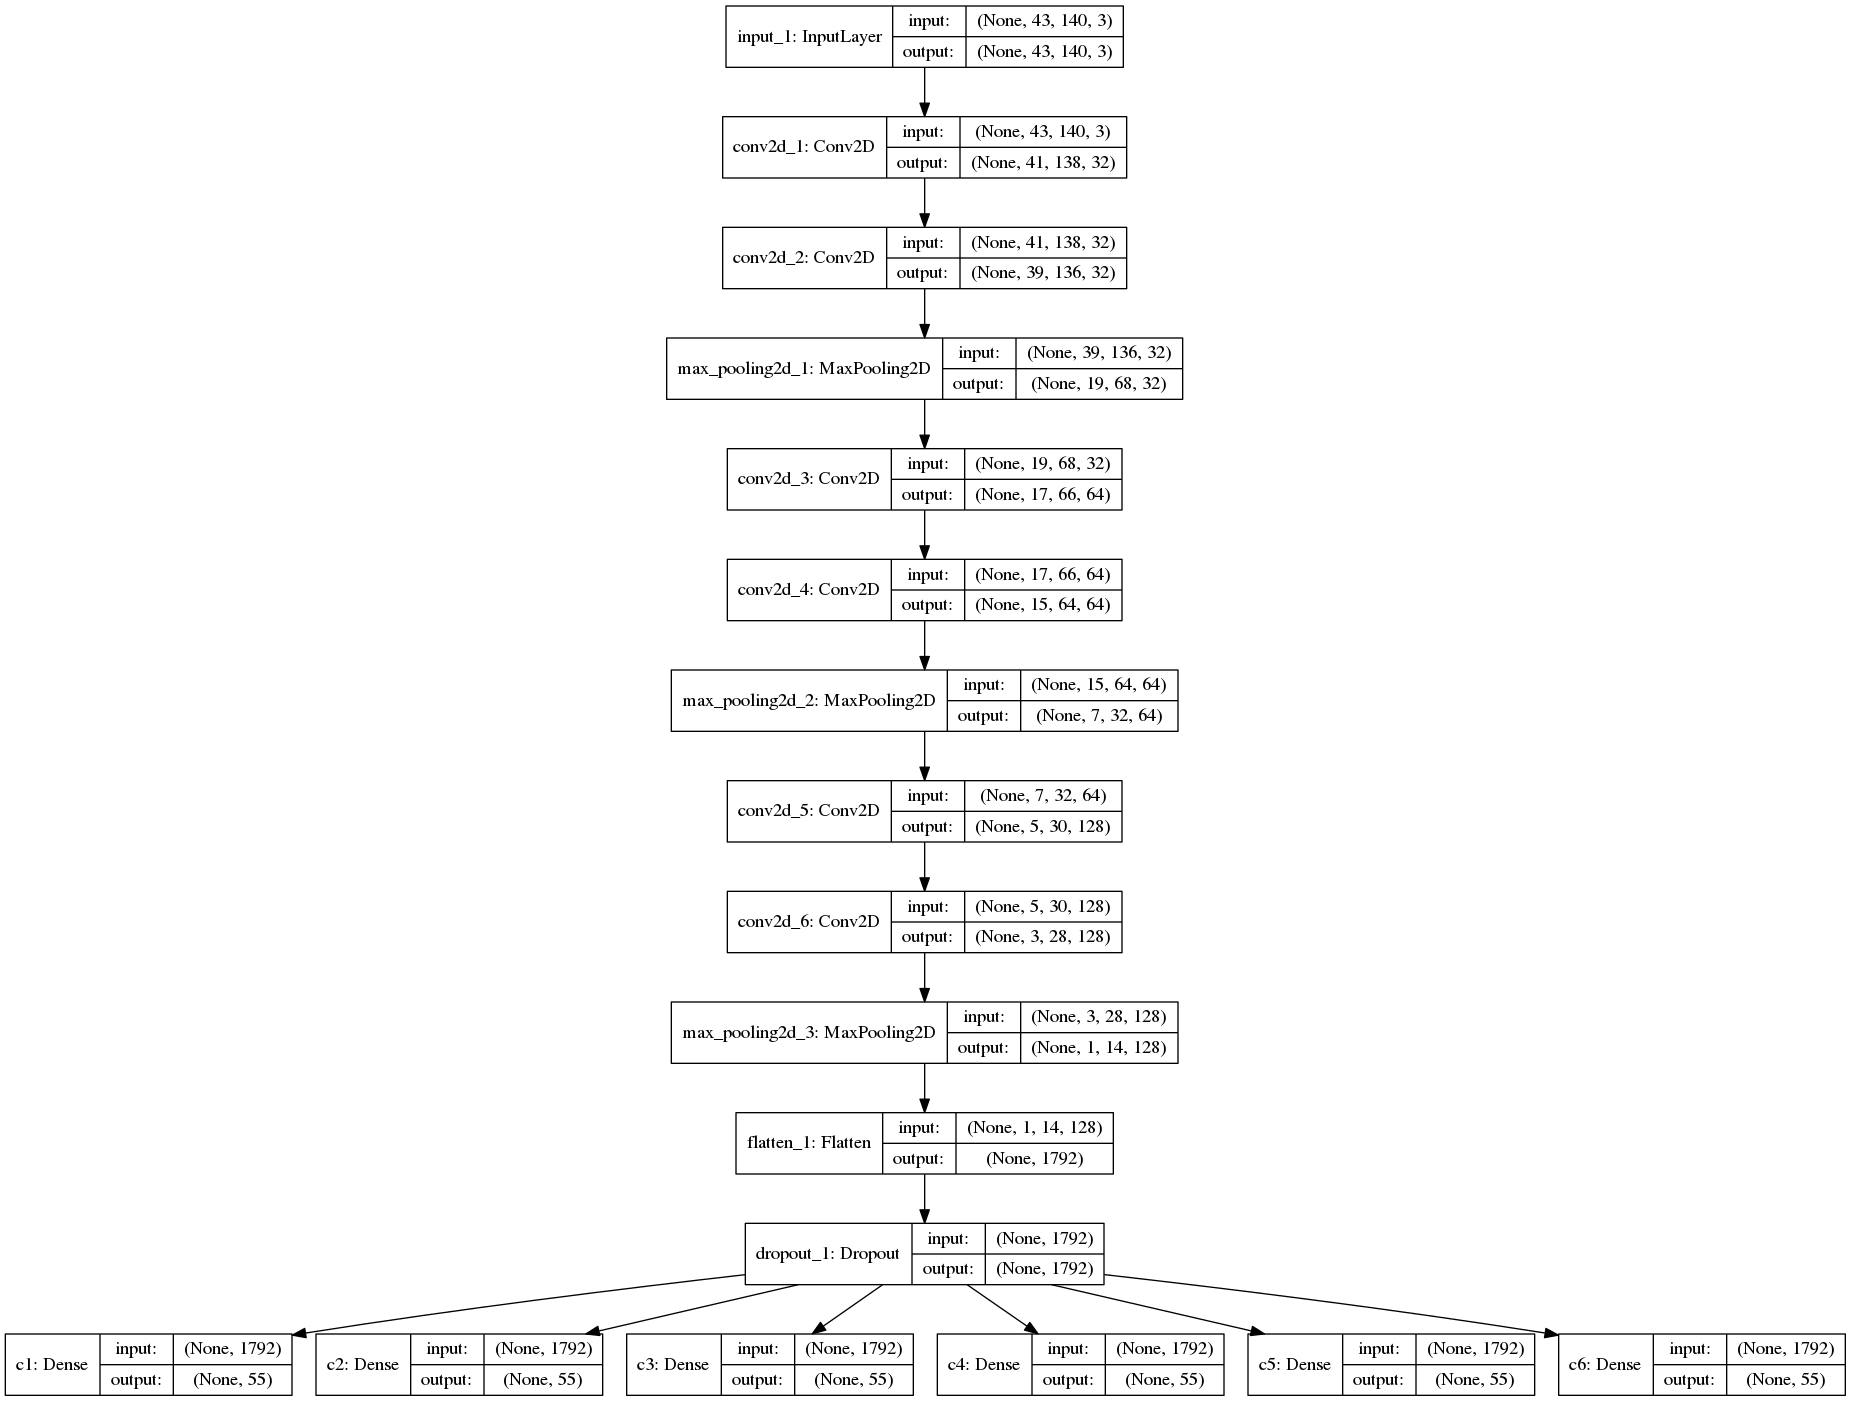

In [2]:
from keras.utils.vis_utils import plot_model
from IPython.display import Image

plot_model(model, to_file="model_v2.png", show_shapes=True)
Image('model_v2.png')

In [3]:
chars = "ABCDEFGHIJKLMNOPQRSTUVWXYZabdefghijlmnqrtuwxy1234567890"
width, height, n_len, n_class = 140, 44, 6, len(chars)

input_tensor = Input((height, width, 3))
x = input_tensor
#for i in range(4):
    #x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    #x = Convolution2D(32*2**i, 3, 3, activation='relu')(x)
    #x = MaxPooling2D((2, 2))(x)

#x = Conv2D(32, (5, 5), activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = Conv2D(32, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(64, (5, 5), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(128, (5, 5), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = Conv2D(128, (3, 3), activation='relu')(x)
x = MaxPooling2D((2, 2))(x)

#x = Conv2D(256, (3, 3), activation='relu')(x)
#x = MaxPooling2D((2, 2))(x)

x = Flatten()(x)
x = Dropout(0.25)(x)
x = [Dense(n_class, activation='softmax', name='c%d'%(i+1))(x) for i in range(n_len)]
model = Model(inputs=input_tensor, outputs=x)

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

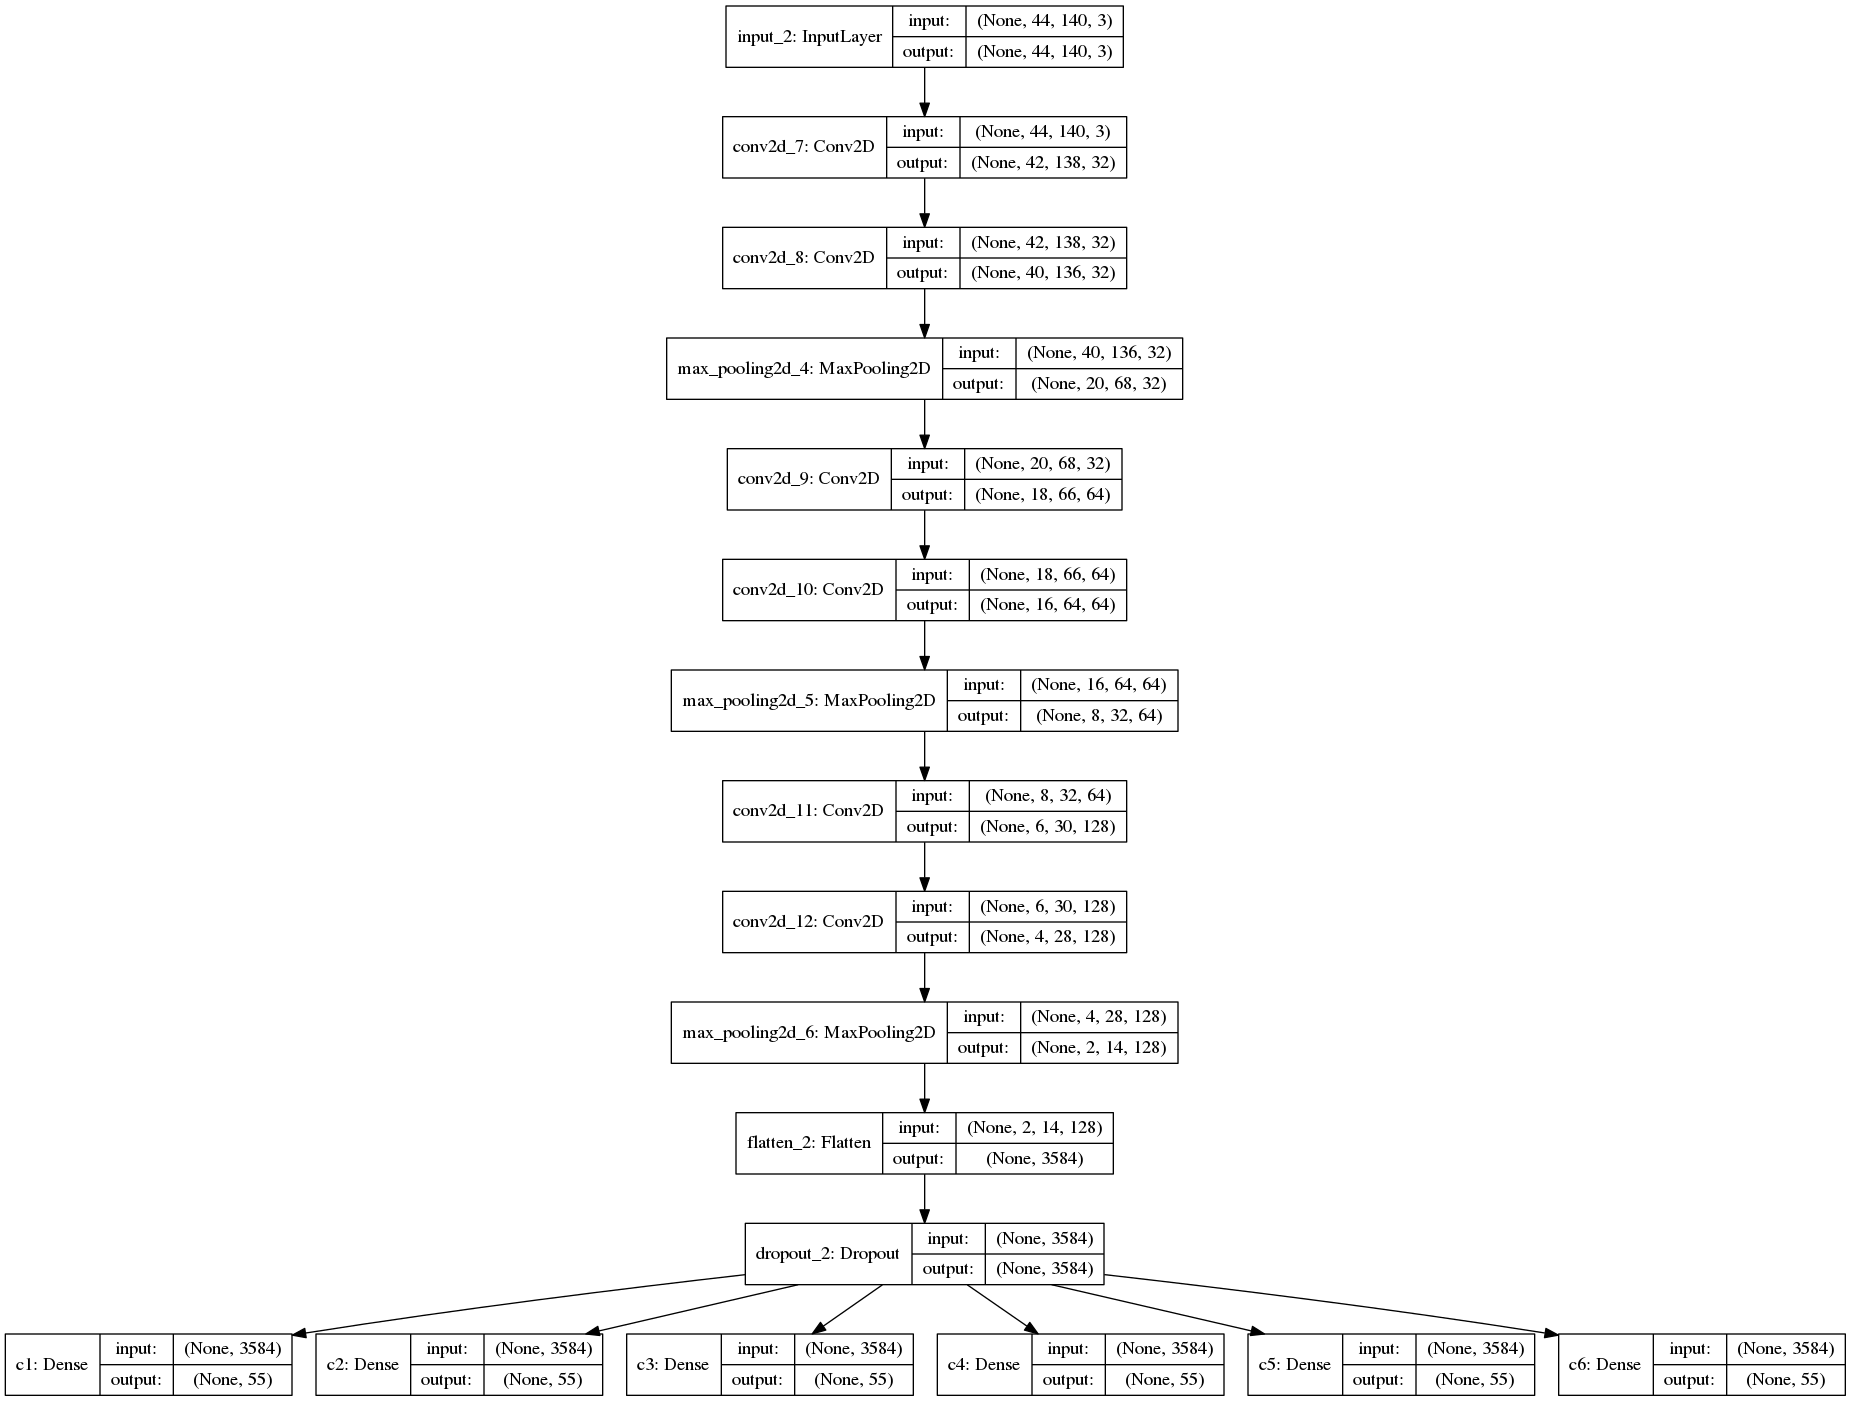

In [4]:
plot_model(model, to_file="model_v2_1.png", show_shapes=True)
Image('model_v2_1.png')

In [7]:
#encoding:UTF-8

import numpy as np
np.random.seed(1337)  # for reproducibility

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from keras import backend as K

from sklearn.model_selection import GridSearchCV

nb_classes = 10

# input image dimensions
img_rows, img_cols = 28, 28

# load training data and do basic data normalization
(X_train, y_train), (X_test, y_test) = mnist.load_data()

if K.image_dim_ordering() == 'th':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# convert class vectors to binary class matrices
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)

def make_model(dense_layer_sizes, nb_filters, nb_conv, nb_pool):
    '''Creates model comprised of 2 convolutional layers followed by dense layers

    dense_layer_sizes: List of layer sizes. This list has one number for each layer
    nb_filters: Number of convolutional filters in each convolutional layer
    nb_conv: Convolutional kernel size
    nb_pool: Size of pooling area for max pooling
    '''

    model = Sequential()

    model.add(Conv2D(nb_filters, (nb_conv, nb_conv),
                     padding='valid', input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(nb_filters, (nb_conv, nb_conv)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(nb_pool, nb_pool)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    for layer_size in dense_layer_sizes:
        model.add(Dense(layer_size))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    return model


dense_size_candidates = [[32], [64], [32, 32], [64, 64]]
my_classifier = make_model([32], 8, 3, 2)

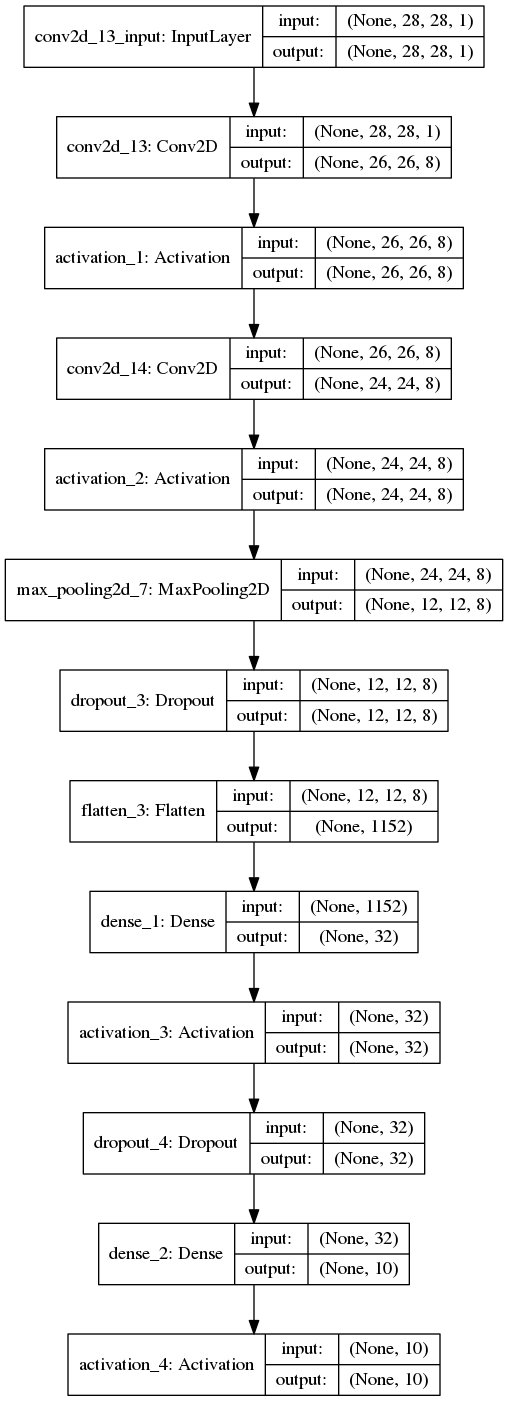

In [8]:
plot_model(my_classifier, to_file="model_v2_2.png", show_shapes=True)
Image('model_v2_2.png')

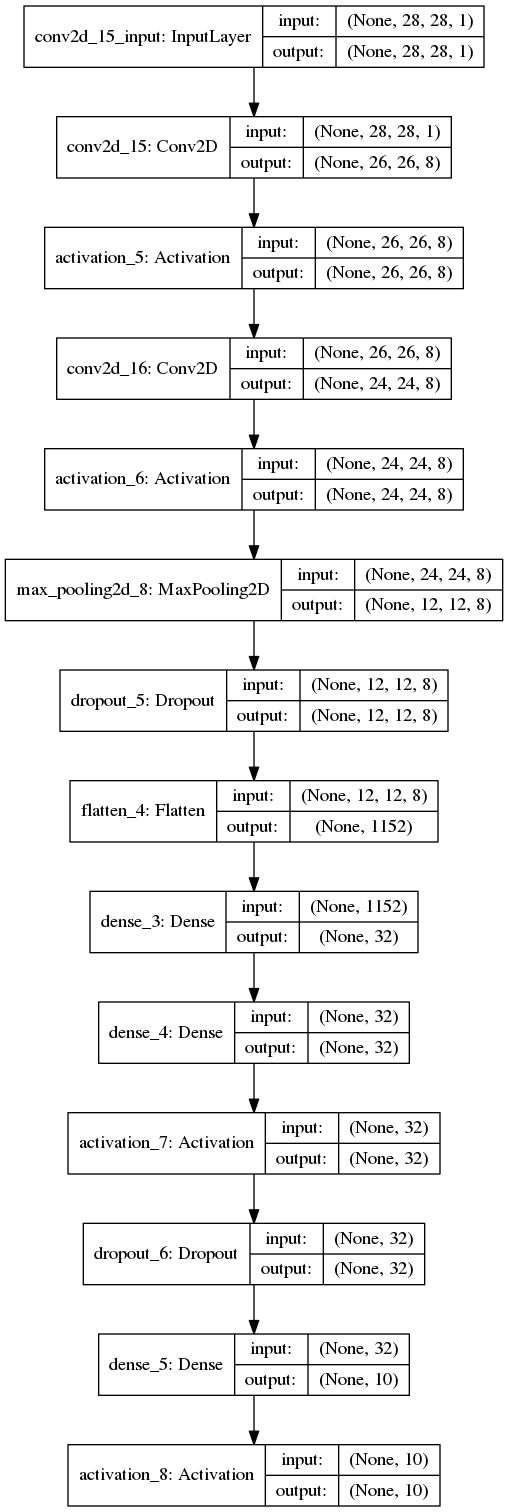

In [9]:
my_classifier = make_model([32, 32], 8, 3, 2)
plot_model(my_classifier, to_file="model_v2_3.png", show_shapes=True)
Image('model_v2_3.png')